In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv("Salaries.csv")

In [2]:
df.head()

,Role,Company,Category,Years' Experience,City,Country,Gender,Currency,Salary,Mode,Period,Non-cash Compensation,Verified Salary Slip
0,Tester,Purchase to unlock 👆,Other / Unknown,3,Bandung,ID,Male,IDR,30000000,Net,Monthly,RSU so stonks.,Verified
1,Software Engineer,Purchase to unlock 👆,Other / Unknown,12,Banten,ID,Male,IDR,54000000,Gross,Monthly,*Vacation allowance = 1 month salary *Full med...,NaN
2,Backend Engineer,Purchase to unlock 👆,Other / Unknown,5,Jakarta,ID,Male,IDR,16500000,Gross,Monthly,NaN,NaN
3,Android Developer,Purchase to unlock 👆,Other / Unknown,5,Jakarta,ID,Male,IDR,23500000,Gross,Monthly,"Insurance, work from home.",NaN
4,Data Scientist,Purchase to unlock 👆,Other / Unknown,6,Jakarta,ID,Male,IDR,14600000,Net,Monthly,NaN,NaN


### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Role                   660 non-null    object
 1   Company                660 non-null    object
 2   Category               660 non-null    object
 3   Years' Experience      660 non-null    int64 
 4   City                   660 non-null    object
 5   Country                660 non-null    object
 6   Gender                 660 non-null    object
 7   Currency               660 non-null    object
 8   Salary                 660 non-null    int64 
 9   Mode                   660 non-null    object
 10  Period                 660 non-null    object
 11  Non-cash Compensation  226 non-null    object
 12  Verified Salary Slip   56 non-null     object
dtypes: int64(2), object(11)
memory usage: 67.2+ KB


In [4]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df)

Non-cash Compensation => 434
Verified Salary Slip => 604


In [38]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(df)

Non-cash Compensation => 65.76%
Verified Salary Slip => 91.52%


In [5]:
df = df[["Role", "City", "Years' Experience", "Salary"]]
df.head()

,Role,City,Years' Experience,Salary
0,Tester,Bandung,3,30000000
1,Software Engineer,Banten,12,54000000
2,Backend Engineer,Jakarta,5,16500000
3,Android Developer,Jakarta,5,23500000
4,Data Scientist,Jakarta,6,14600000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Role               660 non-null    object
 1   City               660 non-null    object
 2   Years' Experience  660 non-null    int64 
 3   Salary             660 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.8+ KB


In [7]:
df.isnull().values.any()

False

In [8]:
df['Role'].value_counts()

Software Engineer       118
Project Manager         107
Backend Engineer         70
Android Developer        64
Data Analyst             52
Frontend Engineer        42
UX Writer                38
Quality Assurance        35
UI Designer              28
IT Support               25
Data Engineer            25
Fullstack Developer      22
Tester                   17
Data Scientist           12
Fullstack Developer       5
Name: Role, dtype: int64

In [9]:
random_index = df.sample(1, random_state = 10).index

wrong_spelling = ['tester']

# replace them with the wrong spelling
df.loc[random_index,'Role'] = wrong_spelling
df['Role'].value_counts()

Software Engineer       118
Project Manager         107
Backend Engineer         70
Android Developer        64
Data Analyst             52
Frontend Engineer        42
UX Writer                38
Quality Assurance        35
UI Designer              28
IT Support               25
Data Engineer            25
Fullstack Developer      22
Tester                   16
Data Scientist           12
Fullstack Developer       5
tester                    1
Name: Role, dtype: int64

In [10]:
df['Role'].replace(['tester'],
                             ['Tester'], inplace=True)
df['Role'].value_counts()

Software Engineer       118
Project Manager         107
Backend Engineer         70
Android Developer        64
Data Analyst             52
Frontend Engineer        42
UX Writer                38
Quality Assurance        35
UI Designer              28
IT Support               25
Data Engineer            25
Fullstack Developer      22
Tester                   17
Data Scientist           12
Fullstack Developer       5
Name: Role, dtype: int64

In [11]:
df['City'].value_counts()

Jakarta       426
Yogyakarta     41
Surabaya       36
Bandung        35
Tangerang      28
Banten         26
Semarang       22
Bekasi         20
Depok          15
Bogor          11
Name: City, dtype: int64

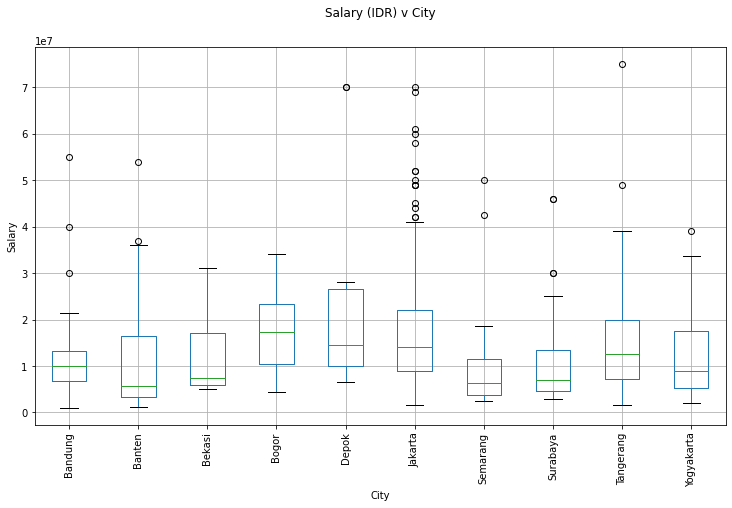

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'City', ax=ax)
plt.suptitle('Salary (IDR) v City')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
df = df[df["Salary"] <= 60000000]
df = df[df["Salary"] >= 330000]

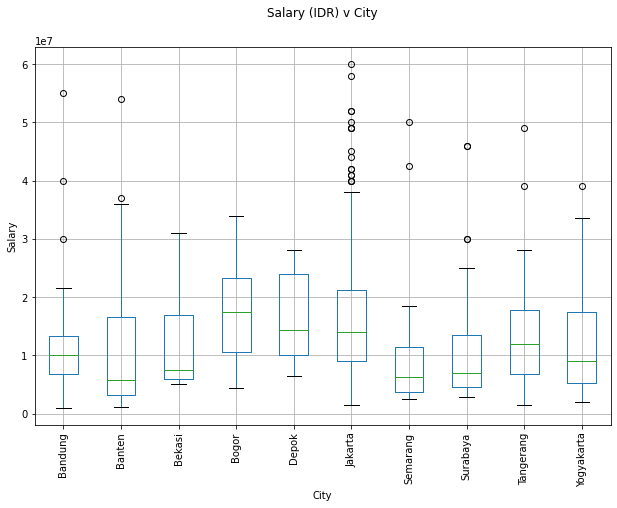

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10, 7))
df.boxplot('Salary', 'City', ax=ax)
plt.suptitle('Salary (IDR) v City')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df["Years' Experience"].unique()

array([ 3, 12,  5,  6, 10,  2,  1,  0,  4,  8, 13,  7, 11,  9, 18, 17, 15,
       20], dtype=int64)

In [16]:
role_label = LabelEncoder()
df['Role'] = role_label.fit_transform(df['Role'])
df["Role"].unique()

array([12, 11,  1,  0,  4,  5,  9,  6, 14,  2, 13,  8,  3, 10,  7])

In [17]:
city_label = LabelEncoder()
df['City'] = city_label.fit_transform(df['City'])
df["City"].unique()

array([0, 1, 5, 8, 3, 2, 7, 9, 6, 4])

In [18]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,Role,City,Years' Experience
85,13,5,1
232,10,5,1
329,11,5,3
570,8,5,2
64,9,5,3
...,...,...,...
462,9,5,2
129,9,5,3
223,13,5,0
43,13,0,12


In [20]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
print(linear_reg.coef_)
print(linear_reg.intercept_)

[  99064.97268376  102360.60051142 1605517.89489184]
8751861.156986361


In [22]:
linear_reg.score(X_test, y_test)

0.42540589086042335

In [23]:
y_pred = linear_reg.predict(X_test)

In [24]:
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))

Mean squared error: 7578470.88
Mean absolute error: 5798513.26


In [25]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
y_pred = dec_tree_reg.predict(X_test)

In [27]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("IDR{:,.02f}".format(error))

IDR9,735,505.98


In [28]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [29]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("IDR{:,.02f}".format(error))

IDR7,696,587.11


In [30]:
X = np.array([["Bandung", 'Tester', 3 ]])
X

array([['Bandung', 'Tester', '3']], dtype='<U11')

In [31]:
X[:, 0] = city_label.transform(X[:,0])
X[:, 1] = role_label.transform(X[:,1])
X = X.astype(float)
X

array([[ 0., 12.,  3.]])

In [32]:
y_pred = regressor.predict(X_test)
y_pred

array([15792985.07462686, 22841964.28571429, 13131144.61797753,
       22841964.28571429, 17012142.85714286,  6013333.33333333,
       15792985.07462686, 10615000.        , 10698529.41176471,
       22841964.28571429,  5188947.36842105,  6013333.33333333,
        5188947.36842105, 24843781.65151515, 24843781.65151515,
       16031250.        , 28230000.        , 15792985.07462686,
       13131144.61797753,  7803961.82352941, 22841964.28571429,
       13131144.61797753, 10615000.        , 22841964.28571429,
       15792985.07462686, 13131144.61797753, 10615000.        ,
       13131144.61797753, 24843781.65151515, 10615000.        ,
        7803961.82352941, 24843781.65151515, 15792985.07462686,
       24843781.65151515, 22841964.28571429, 24843781.65151515,
       22841964.28571429, 24843781.65151515, 15792985.07462686,
        7803961.82352941, 22841964.28571429,  6013333.33333333,
       15792985.07462686,  7803961.82352941, 16031250.        ,
       24843781.65151515, 10698529.41176

In [33]:
data = {"model": regressor, "city_label": city_label, "role_label": role_label}
with open('regresi-prediksi-gaji.pkl', 'wb') as file:
    pickle.dump(data, file)

In [34]:
with open('regresi-prediksi-gaji.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
city_label = data["city_label"]
role_label = data["role_label"]

In [35]:
y_pred = regressor_loaded.predict(X_test)
y_pred

array([15792985.07462686, 22841964.28571429, 13131144.61797753,
       22841964.28571429, 17012142.85714286,  6013333.33333333,
       15792985.07462686, 10615000.        , 10698529.41176471,
       22841964.28571429,  5188947.36842105,  6013333.33333333,
        5188947.36842105, 24843781.65151515, 24843781.65151515,
       16031250.        , 28230000.        , 15792985.07462686,
       13131144.61797753,  7803961.82352941, 22841964.28571429,
       13131144.61797753, 10615000.        , 22841964.28571429,
       15792985.07462686, 13131144.61797753, 10615000.        ,
       13131144.61797753, 24843781.65151515, 10615000.        ,
        7803961.82352941, 24843781.65151515, 15792985.07462686,
       24843781.65151515, 22841964.28571429, 24843781.65151515,
       22841964.28571429, 24843781.65151515, 15792985.07462686,
        7803961.82352941, 22841964.28571429,  6013333.33333333,
       15792985.07462686,  7803961.82352941, 16031250.        ,
       24843781.65151515, 10698529.41176